## Module 04: Cleaning Data


### Lesson 01: Cleaning Data

> Using pandas, clean the quality and tidiness issues you identified in the "Assessing Data" lesson. The dataset is the same: mock Phase II clinical trial data for a new oral insulin called Auralin.

#### 01. Introduction

It can be done manually in spreadsheet programs or text editors, but data cleaning is often best done using code and in three steps.

1. First you define how you're going to clean issue in words, 
2. then you convert these words to code,
3. and finally test your data to make sure if that code worked.

#### 02. Lesson Outline

Data wrangling process:

1. Gather
2. Assess
3. Clean (this lesson)

**Cleaning** your data is the third step in data wrangling. It is where you fix the quality and tidiness issues that you identified in the assess step. In this lesson, you'll clean all of the issues you identified in Lesson 3 using Python and pandas.

This lesson will be structured as follows:

* You'll get remotivated (if you aren't already) to clean the dataset for lessons 3 and 4: Phase II clinical trial data that compares the efficacy and safety of a new oral insulin to treat diabetes to injectable insulin
* You'll learn about the data cleaning process: defining, coding, and testing
* You'll address the missing data first (and learn why it is usually important to address these completeness issues first)
* You'll tackle the tidiness issues next (and learn why this is usually the next logical step)
* And finally, you'll clean up the quality issues

#### 03. Dataset: Oral Insulin Phase II Clinical Trial Data

The Auralin and Novodra are not real insulin products. This clinical trial data was fabricated for the sake of this course. When assessing this data, the issues that you'll detect (and later clean) are meant to simulate real-world data quality and tidiness issues.

That said:

* This dataset was constructed with the consultation of real doctors to ensure plausibility.
* This clinical trial data for an alternative insulin was inspired and closely mimics this real clinical trial for a new inhaled insulin called Afrezza.
* The data quality issues in this dataset mimic real, common data quality issues in healthcare data. These issues impact quality of care, patient registration, and revenue.
* The patients in this dataset were created using this fake name generator and do not include real names, addresses, phone numbers, emails, etc.

#### 04. Manual vs. Programmatic Cleaning

* You can fix quality and tidiness issues manually in spreadsheet programs or text editors, for example, doing things like retyping incorrect data, or copying and pasting columns in rows. But manual cleaning is inefficient, error prone and also demoralizing. You should never clean manually, unless the issues are one-off occurrences.
* Data cleaning is best done programmatically. This means using code to automate cleaning tasks and minimize repetition, which saves you time.

#### 05. Data Cleaning Process

The very first thing to do before any cleaning occurs is to make a copy of each piece of data. All of the cleaning operations will be conducted on this copy so you can still view the original dirty and/or messy dataset later. Copying DataFrames in pandas is done using the `copy` method. If the original DataFrame was called `df`, the soon-to-be clean copy of the dataset could be named `df_clean`.

Think of programmatic data cleaning as its own separate process within data wrangling. It also has three steps: defining, coding, and testing.

* **Programmatic Data Cleaning**
    1. **Define**: you'll define a data cleaning plan in writing. You convert your assessments into cleaning tasks by writing little how-to guides. Think of this like pseudo code. In the future this plan also serves as documentation so others or yourself in the future can look at your work and reproduce it.
    2. **Code**: you'll translate these words to code and actually run it.
    3. **Test**: you'll test your dataset often using code to make sure your cleaning code worked. This is kind of like a revisit of the assess step. Similar functions are used too.
    
* **Example**
    1. **Define**: Convert the zip code column's data type from a float to a string using astype, remove the '.0' using string slicing, and pad four digit zip codes with a leading 0
    2. **Code**: `patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5, fillchar='0')`
    3. **Test**: `patients_clean.zip_code.head()`

#### 06. Cleaning Sequences

But you can also use multiple **Define**, **Code**, and **Test** headers, one for each data quality and tidiness issue (or group of data quality and tidiness issues). Effectively, you are defining then coding then testing immediately. This sequence is helpful when you have a lot of quality and tidiness issues to clean. Since that is the case in this lesson, this sequence will be used.

Pasting each assessment above the **Define** header as its own header can also be helpful.

Here's what this sequence looks like using the *animals.csv* dataset (and reusing the above *Gather* and *Assess* steps):

#### 07. Quiz and Solution Notebooks

The rest of this lesson primarily consists of Jupyter Notebooks, of which there will be two types: one quiz notebook that you'll work with throughout the whole lesson (i.e., your work will carry over from page to page) and three solution notebooks.

#### 08. Address Missing Data First

It's usually best to find missing data first if you can. In other words, completeness issues, which is a part of data quality. Get it all intact there so the subsequent cleaning operations you perform on those columns or rows won't have to be redone i.e. not filling in the missing data, then cleaning some rows and columns with missing data, then joining that missing data in later and having to redo those cleaning operations.

Imputing means filling in missing data values with other values, using some appropriate method. Here is more information on the topic of imputation: Wikipedia: Imputation

#### 09. Quiz: Missing Data

**Gather**

In [1]:
import pandas as pd

In [2]:
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

**Assess**

In [3]:
patients

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,386-334-5237RafaelCardosoCosta@gustr.com,8/31/1931,183.9,70,26.4
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728.0,United States,775-533-5933MaryBAdams@einrot.com,11/19/1969,146.3,65,24.3
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037.0,United States,XiuxiuChang@einrot.com1 408 778 3236,8/13/1958,158.0,60,30.9
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105.0,United States,816-265-9578DavidGustafsson@armyspy.com,3/6/1937,163.9,66,26.5
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4


In [4]:
treatments

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
5,jasmine,sykes,-,42u - 44u,7.56,7.18,0.38
6,sophia,haugen,37u - 42u,-,7.65,7.27,0.38
7,eddie,archer,31u - 38u,-,7.89,7.55,0.34
8,saber,ménard,-,54u - 54u,8.08,7.70,NaN
9,asia,woźniak,30u - 36u,-,7.76,7.37,NaN


In [5]:
adverse_reactions

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


In [6]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [7]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [8]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 896.0+ bytes


In [9]:
all_columns = pd.Series(list(patients)+list(treatments)+list(adverse_reactions))
all_columns

0           patient_id
1         assigned_sex
2           given_name
3              surname
4              address
5                 city
6                state
7             zip_code
8              country
9              contact
10           birthdate
11              weight
12              height
13                 bmi
14          given_name
15             surname
16             auralin
17             novodra
18         hba1c_start
19           hba1c_end
20        hba1c_change
21          given_name
22             surname
23    adverse_reaction
dtype: object

In [10]:
all_columns[all_columns.duplicated()]

14    given_name
15       surname
21    given_name
22       surname
dtype: object

In [11]:
patients.columns

Index(['patient_id', 'assigned_sex', 'given_name', 'surname', 'address',
       'city', 'state', 'zip_code', 'country', 'contact', 'birthdate',
       'weight', 'height', 'bmi'],
      dtype='object')

In [12]:
treatments.columns

Index(['given_name', 'surname', 'auralin', 'novodra', 'hba1c_start',
       'hba1c_end', 'hba1c_change'],
      dtype='object')

In [13]:
adverse_reactions.columns

Index(['given_name', 'surname', 'adverse_reaction'], dtype='object')

In [14]:
list(patients)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'contact',
 'birthdate',
 'weight',
 'height',
 'bmi']

In [15]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [16]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [17]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [18]:
patients.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
186,187,female,Jane,Citizen,2866 Myra Street,Providence,RI,2908.0,United States,JaneCitizen@cuvox.de+1 (401) 485-6384,9/27/1974,143.0,65,23.8
422,423,female,Jázmin,Györfy,1049 Park Boulevard,Haverhill,IA,50120.0,United States,641-475-9654GyorfyJazmin@jourrapide.com,9/21/1958,129.4,64,22.2
54,55,female,Louise,Johnson,4984 Hampton Meadows,Burlington,MA,1803.0,United States,LouiseJohnson@rhyta.com978-407-1874,3/1/1931,141.0,62,25.8
200,201,male,Kifle,Mustafa,4535 Prospect Street,Pennsauken,NJ,8110.0,United States,856-655-5415KifleMustafa@gustr.com,10/9/1965,186.1,69,27.5
151,152,female,Satsita,Batukayev,2813 Frederick Street,Citrus Heights,California,95610.0,United States,916-224-7868SatsitaBatukayev@teleworm.us,2/17/1953,219.6,66,35.4


In [19]:
patients.surname.value_counts()

Doe            6
Taylor         3
Jakobsen       3
Lương          2
Hueber         2
Kadyrov        2
Nilsen         2
Dratchev       2
Correia        2
Kowalczyk      2
Cabrera        2
Grímsdóttir    2
Tucker         2
Liễu           2
Souza          2
Woźniak        2
Berg           2
Parker         2
Silva          2
Lâm            2
Lund           2
Cindrić        2
Gersten        2
Collins        2
Bùi            2
Tạ             2
Aranda         2
Johnson        2
Schiavone      2
Ogochukwu      2
              ..
Achebe         1
Mortensen      1
Nnonso         1
Rocha          1
Knudsen        1
Mathieu        1
Bjarkason      1
Hansen         1
Sjöberg        1
Tansey         1
Nash           1
Johnsrud       1
Enríquez       1
Luoma          1
Mueller        1
Ruais          1
Rukavina       1
Poulsen        1
Wolfe          1
Fesahaye       1
Ono            1
Wiśniewska     1
Wellish        1
Grunewald      1
Marchesi       1
Wolf           1
Teng           1
Gyenes        

In [20]:
patients.address.value_counts()

123 Main Street               6
2778 North Avenue             2
2476 Fulton Street            2
648 Old Dear Lane             2
3542 Robinson Court           1
1790 Nutter Street            1
1251 Clarence Court           1
3868 Freed Drive              1
4890 Abia Martin Drive        1
3788 Worthington Drive        1
846 Copperhead Road           1
2335 Webster Street           1
631 Isaacs Creek Road         1
2020 Gore Street              1
3499 Baker Avenue             1
2458 Broadway Avenue          1
1092 Deans Lane               1
353 Whaley Lane               1
1079 Ingram Street            1
1428 Turkey Pen Lane          1
2785 Norma Lane               1
2924 Stanley Avenue           1
1733 Blackwell Street         1
4508 Goldcliff Circle         1
4932 Goldleaf Lane            1
3214 Better Street            1
1043 Ventura Drive            1
212 Tibbs Avenue              1
435 Pike Street               1
3710 Jerry Dove Drive         1
                             ..
1346 Nic

In [21]:
patients[patients.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [22]:
patients.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
51     107.1
270    108.1
198    108.5
48     109.1
478    109.6
141    110.2
38     111.8
438    112.0
14     112.0
235    112.2
307    112.4
191    112.6
408    113.1
49     113.3
326    114.0
338    114.1
253    117.0
321    118.4
168    118.8
1      118.8
350    119.0
207    119.2
265    120.0
341    120.3
       ...  
332    224.0
252    224.2
12     224.2
222    224.8
166    225.3
111    225.9
101    226.2
150    226.6
352    227.7
428    227.7
88     227.7
13     228.4
339    229.0
182    230.3
121    230.8
257    231.7
395    231.9
246    232.1
219    237.8
11     238.7
50     238.9
441    239.1
499    239.6
439    242.0
487    242.4
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

In [23]:
weight_lbs = patients[patients.surname == 'Zaitseva'].weight * 2.20462
height_in = patients[patients.surname == 'Zaitseva'].height
bmi_check = 703 * weight_lbs / (height_in * height_in)
bmi_check

210    19.055827
dtype: float64

In [24]:
patients[patients.surname == 'Zaitseva'].bmi

210    19.1
Name: bmi, dtype: float64

In [25]:
sum(treatments.auralin.isnull())

0

In [26]:
sum(treatments.novodra.isnull())

0

*Quality*

1. `patients` table
    * Zip code is a float not a string
    * Zip code has four digits sometimes
    * Tim Neudorf height is 27 in instead of 72 in
    * Full state names sometimes, abbreviations other times
    * Dsvid Gustafsson
    * Missing demographic information (address - contact columns) **(can't clean)**
    * Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
    * Multiple phone number formats
    * Default John Doe data
    * Multiple records for Jakobsen, Gersten, Taylor
    * kgs instead of lbs for Zaitseva weight
2. `treatments` table
    * Missing HbA1c changes
    * The letter 'u' in starting and ending doses for Auralin and Novodra
    * Lowercase given names and surnames
    * Missing records (280 instead of 350)
    * Erroneous datatypes (auralin and novodra columns)
    * Inaccurate HbA1c changes (leading 4s mistaken as 9s)
    * Nulls represented as dashes (-) in auralin and novodra columns
3. `adverse_reactions` table
    * Lowercase given names and surnames

* *Tidiness*
    - Contact column in `patients` table should be split into phone number and email
    - Three variables in two columns in `treatments` table (treatment, start dose and end dose)
    - Adverse reaction should be part of the `treatments` table
    - Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables

#### 10. Solution: Missing Data

**Clean**

*Missing Data*

<font color='red'>Complete the following two "Missing Data" **Define, Code, and Test** sequences after watching the *"Address Missing Data First"* video.</font>

In [27]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

1. `treatments`: Missing records (280 instead of 350)
    * Note: the missing `treatments` records are stored in a file named `treatments_cut.csv`, which you can see in this Jupyter Notebook's dashboard (click the **jupyter** logo in the top lefthand corner of this Notebook). Hint: [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html) for the function used in the solution.*

1.1 `Define`

* Concatenate treatments_clean and treatments_cut file.

1.2 `Code`

In [28]:
# Your cleaning code here
treatments_cut = pd.read_csv('treatments_cut.csv')
treatments_clean = pd.concat([treatments_clean, treatments_cut],
                             ignore_index=True)

1.3 `Test`

In [29]:
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [30]:
treatments_clean.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN
349,armina,sauvé,36u - 46u,-,7.86,7.40,NaN


2. `treatments`: Missing HbA1c changes and Inaccurate HbA1c changes (leading 4s mistaken as 9s)
    * Note: the "Inaccurate HbA1c changes (leading 4s mistaken as 9s)" observation, which is an accuracy issue and not a completeness issue, is included in this header because it is also fixed by the cleaning operation that fixes the missing "Missing HbA1c changes" observation. Multiple observations in one **Define, Code, and Test** header occurs multiple times in this notebook.

2.1 `Define`

* Replace hba1c_change with the value of (hba1c_start - hba1c_end).

2.2 `Code`

In [31]:
treatments_clean["hba1c_change"] = treatments_clean["hba1c_start"] - treatments_clean["hba1c_end"]

2.3 `Test`

In [32]:
sum(treatments_clean.hba1c_change.isnull())

0

#### 11. Cleaning for Tidiness

Since Hadley Wickham is the pioneer of tidy data, let's start this bit with a quote from his paper on the subject.

> A huge amount of effort is spent cleaning data to get it ready for analysis, but there has been little research on how to make data cleaning as easy and effective as possible. This paper tackles a small, but important, component of data cleaning: data tidying.

The key take away is that Tidy datasets are easy to manipulate. And in the context of data wrangling, tidy datasets with data quality issues are almost always easier to clean than non-tidy as they have data quality issues. That means, it's generally best to clean the tidiness issues first, which are our structural issues, then clean the quality issues, which are the content issues.

#### 12. Quiz: Tidiness

**Tidiness**

<font color='red'>Complete the following four "Tidiness" **Define, Code, and Test** sequences after watching the *"Cleaning for Tidiness"* video.</font>

#### 13. Solution: Tidiness

3. Contact column in `patients` table contains two variables: phone number and email
    * Hint 1: use regular expressions with pandas' [`str.extract` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html). Here is an amazing [regex tutorial](https://regexone.com/). 
    * Hint 2: [various phone number regex patterns](https://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number). 
    * Hint 3: [email address regex pattern](http://emailregex.com/), which you might need to modify to distinguish the email from the phone number.*

3.1 `Define`

* Split phone number and email to two columns from contact column.

3.2 `Code`

In [33]:
patients_clean['phone_number'] = patients_clean['contact'].str.extract(r'((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})')
patients_clean['email'] = patients_clean['contact'].str.extract(r'([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.][a-zA-Z]+)')
patients_clean.drop('contact', axis=1, inplace=True)

3.3 `Test`

In [34]:
list(patients_clean)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'birthdate',
 'weight',
 'height',
 'bmi',
 'phone_number',
 'email']

In [35]:
patients_clean.phone_number.sample(5)

382    989-822-1351
334    630-837-9473
268    650-631-0002
451    909 982 4264
274    740-552-2444
Name: phone_number, dtype: object

In [36]:
patients_clean.email.sample(5)

174    MichelleDTansey@dayrep.com
268        PaiviMattila@rhyta.com
310          HugoCollins@cuvox.de
141    EvelynUspenskaya@rhyta.com
443      KajsaEidem@superrito.com
Name: email, dtype: object

In [37]:
# Confirm that no emails start with an integer (regex didn't match for this)
patients_clean.email.sort_values().head()

404               AaliyahRice@dayrep.com
11          Abdul-NurMummarIsa@rhyta.com
332                AbelEfrem@fleckens.hu
258              AbelYonatan@teleworm.us
305    AddolorataLombardi@jourrapide.com
Name: email, dtype: object

4. Three variables in two columns in `treatments` table (treatment, start dose and end dose)
    * Hint: use pandas' [melt function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) and [`str.split()` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html). Here is an excellent [`melt` tutorial](https://deparkes.co.uk/2016/10/28/reshape-pandas-data-with-melt/).

4.1 `Define`

* Melt the auralin and novodra columns to `treatments` and a dose column (does will still contain both start and end dose at this point). Then split the dose column on '-' to obtain start_dose and end_dose columns. Drop the intermediate dose column.

4.2 `Code`

In [38]:
treatments_clean = pd.melt(treatments_clean, 
                           id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment',
                           value_name='dose')

In [39]:
treatments_clean = treatments_clean[treatments_clean['dose'] != '-']

In [40]:
treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str

In [41]:
treatments_clean.drop('dose', axis=1, inplace=True)

4.3 `Test`

In [42]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


5. Adverse reaction should be part of the `treatments` table
    * Hint: [tutorial](https://chrisalbon.com/python/pandas_join_merge_dataframe.html) for the function used in the solution.

5.1 `Define`

* Merge the adverse_reaction column to the `treatments` table, joining on `given_name` and `surname`.

5.2 `Code`

In [43]:
adverse_reactions_clean.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [44]:
treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean,
                            on=['given_name', 'surname'], how='left')

5.3 `Test`

In [45]:
treatments_clean.sample(5)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
72,lewis,webb,7.85,7.52,0.33,auralin,39u,44u,NaN
13,clinton,miller,7.79,7.40,0.39,auralin,42u,51u,throat irritation
125,jia li,teng,7.66,7.32,0.34,auralin,48u,54u,nausea
29,onyekachukwu,obinna,7.58,7.12,0.46,auralin,37u,46u,NaN
126,ilija,horvat,7.77,7.38,0.39,auralin,42u,50u,NaN


6. Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables  and Lowercase given names and surnames
    * Hint: [tutorial](https://chrisalbon.com/python/pandas_join_merge_dataframe.html) for one function used in the solution and [tutorial](http://erikrood.com/Python_References/dropping_rows_cols_pandas.html) for another function used in the solution.

6.1 `Define`

* replace `given_name` and `surname` columns with `patient_id` in `treatments` tables

6.2 `Code`

In [46]:
patients_cut = patients_clean.loc[:,['patient_id', 'given_name', 'surname']]

In [47]:
patients_cut.given_name = patients_cut.given_name.str.lower()
patients_cut.surname = patients_cut.surname.str.lower()

In [48]:
patients_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 3 columns):
patient_id    503 non-null int64
given_name    503 non-null object
surname       503 non-null object
dtypes: int64(1), object(2)
memory usage: 11.9+ KB


In [49]:
treatments_clean = pd.merge(treatments_clean, patients_cut,
                            on=['given_name', 'surname'])

In [50]:
treatments_clean.drop(['given_name', 'surname'], axis=1, inplace=True)

6.3 `Test`

In [51]:
treatments_clean.sample(5)

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
312,7.82,7.36,0.46,novodra,51u,54u,NaN,59
293,7.97,7.52,0.45,novodra,48u,53u,NaN,300
140,7.85,7.47,0.38,auralin,36u,44u,NaN,144
253,7.92,7.60,0.32,novodra,35u,33u,NaN,499
119,7.66,7.40,0.26,auralin,55u,62u,throat irritation,403


In [52]:
# Patient ID should be the only duplicate column
all_columns = pd.Series(list(patients_clean) + list(treatments_clean))
all_columns

0           patient_id
1         assigned_sex
2           given_name
3              surname
4              address
5                 city
6                state
7             zip_code
8              country
9            birthdate
10              weight
11              height
12                 bmi
13        phone_number
14               email
15         hba1c_start
16           hba1c_end
17        hba1c_change
18           treatment
19          dose_start
20            dose_end
21    adverse_reaction
22          patient_id
dtype: object

In [53]:
all_columns[all_columns.duplicated()]

22    patient_id
dtype: object

#### 14. Cleaning for Quality

Once the missing data and tidiness issues are cleaned, cleaning the remaining data quality issues, i.e. the ones outside of the completeness issues is all that remains. And there were a lot of data quality issues in this dataset. 19 in total and 16 outside of the missing data issues to be exact.

#### 15. Quiz: Quality

**Quality**

<font color='red'>Complete the remaining "Quality" **Define, Code, and Test** sequences after watching the *"Cleaning for Quality"* video.</font>

#### 16. Solution: Quality

7. `Zip code` is a float not a string and `Zip code` has four digits sometimes
    * Hint: see the "Data Cleaning Process" page.

7.1 `Define`

* Convert the zip code column's data type from a float to a string using `astype`, and remove to '.0' using string slicing, and past for digit zip codes with a leading 0.

7.2 `Code`

In [54]:
import numpy as np

In [55]:
patients_clean['zip_code'] = patients_clean['zip_code'].astype(str).str[:-2].str.pad(5, fillchar='0')
# Reconvert NaNs entries that were converted to '0000n' by code above
patients_clean['zip_code'] = patients_clean['zip_code'].replace('0000n', np.nan)

7.3 `Test`

In [56]:
patients_clean.zip_code.sample(5)

139    45202
491    78205
433    15215
118    70528
472    39120
Name: zip_code, dtype: object

8. Tim Neudorf `height` is 27 in instead of 72 in

8.1 `Define`

* Replace height for rows in the `patients` table that have a height of 27 in (there is only one) with 72 in.

8.2 `Code`

In [57]:
patients_clean['height'] = patients_clean['height'].replace(27, 72)

8.3 `Test`

In [58]:
patients_clean.query('height == 27')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


In [59]:
# Confirm the replacement worked
patients_clean.query('surname == "Neudorf"').height

4    72
Name: height, dtype: int64

9. Full `state` names sometimes, abbreviations other times
    * Hint: [tutorial](https://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html) for method used in solution.

9.1 `Define`

* Replace `state` for rows in the `patients` table with abbreviations

9.2 `Code`

In [60]:
patients_clean[patients_clean.state.str.len() > 2].state.value_counts()

California    36
New York      25
Illinois      14
Florida       13
Nebraska       4
Name: state, dtype: int64

In [61]:
state_abbs = {'California': 'CA', 
              'New York': 'NY', 
              'Illinois': 'IL', 
              'Florida': 'FL', 
              'Nebraska': 'NE'}
patients_clean.replace({'state': state_abbs}, inplace=True)

```python
# Anther Method

# Mapping from full state name to abbreviation
state_abbrev = {'California': 'CA',
                'New York': 'NY',
                'Illinois': 'IL',
                'Florida': 'FL',
                'Nebraska': 'NE'}

# Function to apply
def abbreviate_state(patient):
    if patient['state'] in state_abbrev.keys():
        abbrev = state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']
    
patients_clean['state'] = patients_clean.apply(abbreviate_state, axis=1)
```

9.3 `Test` 

In [62]:
patients_clean[patients_clean.state.str.len() > 2].state.value_counts()

Series([], Name: state, dtype: int64)

10. `Dsvid Gustafsson`

10.1 `Define`

* Replace "Dsvid guastafsson" with "David guastafsson"

10.2 `Code`

In [63]:
patients_clean[patients_clean.given_name == 'Dsvid']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com


In [64]:
give_name_idx = patients_clean[patients_clean.given_name == 'Dsvid'].index

In [65]:
patients_clean.loc[give_name_idx, 'given_name'] = 'David'

```python
# Another Method (not recommend for future!)

patients_clean.given_name = patients_clean.given_name.replace('Dsvid', 'David')
```

10.3 `Test` 

In [66]:
patients_clean[patients_clean.given_name == 'Dsvid']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


11. Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns) and Erroneous datatypes (auralin and novodra columns) and The letter 'u' in starting and ending doses for Auralin and Novodra.

* Hint: [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) for one method used in solution, [documentation page](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) for one function used in the solution, and [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.strip.html) for another method used in the solution.

11.1 `Define`

* Convert "assigned sex" and "state" to categorical type
* Convert "zip_code" to string type (`Complete`)
* Convert "birthday" to datetime type

11.2 `Code`

In [67]:
patients_clean['assigned_sex'] = patients_clean['assigned_sex'].astype('category')

In [68]:
patients_clean['state'] = patients_clean['state'].astype('category')

In [69]:
patients_clean['birthdate'] = pd.to_datetime(patients_clean.birthdate)

In [70]:
treatments_clean['dose_start'] = treatments_clean['dose_start'].str.strip('u').astype(int)

In [71]:
treatments_clean['dose_end'] = treatments_clean['dose_end'].str.strip('u').astype(int)

11.3 `Test`

In [72]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null category
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null category
zip_code        491 non-null object
country         491 non-null object
birthdate       503 non-null datetime64[ns]
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
phone_number    491 non-null object
email           491 non-null object
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 53.9+ KB


In [73]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 8 columns):
hba1c_start         349 non-null float64
hba1c_end           349 non-null float64
hba1c_change        349 non-null float64
treatment           349 non-null object
dose_start          349 non-null int64
dose_end            349 non-null int64
adverse_reaction    35 non-null object
patient_id          349 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 24.5+ KB


12. Multiple phone number formats 

* Hint: helpful [Stack Overflow answer](https://stackoverflow.com/a/123681).

12.1 `Define`

* Strip "+()-" in phone_number column and store each number without any formatting.

12.2 `Code`

In [74]:
patients_clean['phone_number'] = patients_clean['phone_number'].str.replace(r'\D+', '').str.pad(11, fillchar='1')

12.3 `Test`

In [75]:
patients_clean.phone_number.sample(5)

237    11234567890
138    18049081436
199    12056484197
188    12122013108
97     14028484923
Name: phone_number, dtype: object

13. Default John Doe data

* Recall that it is assumed that the data that this John Doe data displaced is not recoverable. Pad the phone number with a 1 if the length of the number is 10 digits (we want country code).

13.1 `Define`

* Remove the non-recoverable John Doe records from the patients table.

13.2 `Code`

In [76]:
patients_clean.query('given_name == "John" & surname == "Doe"')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
215,216,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
229,230,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
237,238,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
244,245,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
251,252,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
277,278,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com


In [77]:
patients_clean = patients_clean.query('given_name != "John" & surname != "Doe"')

13.3 `Test`

In [78]:
patients_clean.query('given_name == "John" & surname == "Doe"')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


14. Multiple records for Jakobsen, Gersten, Taylor

14.1 `Define`

* Remove the Jake Jakobsen, Pat Gersten, and Sandy Taylor rows from the `patients` table. 
* These are the nicknames, which happen to also not be in the `treatments` table (removing the wrong name would create a consistency issue between the `patients` and `treatments` table). 
* These are all the second occurrence of the duplicate. 
* These are also the only occurences of non-null duplicate addresses.

14.2 `Code`

In [79]:
patients_clean.query('surname == "Jakobsen"')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com


In [80]:
patients_clean.query('surname == "Gersten"')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com
502,503,male,Pat,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [81]:
patients_clean.query('surname == "Taylor"')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us


In [82]:
# tilde means not: http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing
patients_clean = patients_clean[~((patients_clean.address.duplicated()) & patients_clean.address.notnull())]

14.3 `Test`

In [83]:
patients_clean.query('surname == "Jakobsen" | surname == "Gersten" | surname == "Taylor"')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com


15. kgs instead of lbs for Zaitseva weight

* Hint: Use [advanced indexing](https://stackoverflow.com/a/44913631) to isolate the row where the surname is `Zaitseva` and convert the entry in its weight field from kg to lbs.

15.1 `Define`

* Convert weight kg to lbs for "Zaitseva" in `patients_clean` table

15.2 `Code`

In [84]:
patients_clean.query('surname == "Zaitseva"')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691,United States,1938-11-26,48.8,63,19.1,13302022145,CamillaZaitseva@superrito.com


In [85]:
weight_kg = patients_clean.query('surname == "Zaitseva"').weight.values[0]
mask = patients_clean.surname == 'Zaitseva'
column_name = 'weight'
patients_clean.loc[mask, column_name] = weight_kg * 2.20462

15.3 `Test`

In [86]:
patients_clean.query('surname == "Zaitseva"').weight

210    107.585456
Name: weight, dtype: float64

In [87]:
# 48.8 shouldn't be the lowest anymore
patients_clean.weight.sort_values().head()

459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
Name: weight, dtype: float64

#### 17. Flashforward

**Adverse Reactions**

In [129]:
treatments_final = treatments_clean.copy()

In [130]:
treatments_group = treatments_final.groupby(['treatment', 'adverse_reaction'])

In [131]:
treatments_group.treatment.count()

treatment  adverse_reaction         
auralin    cough                         1
           headache                      1
           hypoglycemia                 10
           nausea                        1
           throat irritation             2
novodra    cough                         1
           headache                      2
           hypoglycemia                 10
           injection site discomfort     6
           nausea                        1
Name: treatment, dtype: int64

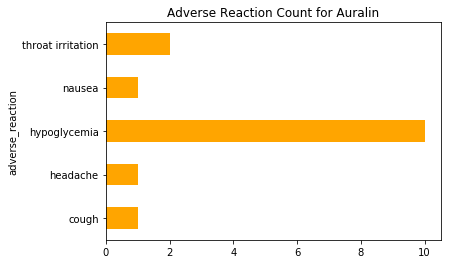

In [132]:
treatments_group.treatment.count().auralin.plot(kind='barh',
                                                title='Adverse Reaction Count for Auralin',
                                                color='orange');

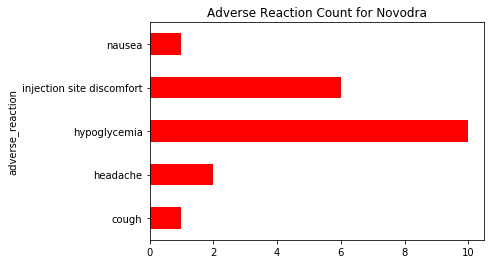

In [133]:
treatments_group.treatment.count().novodra.plot(kind='barh',
                                                title='Adverse Reaction Count for Novodra',
                                                color='red');

In [134]:
treatments_final['dose_change'] = treatments_final.dose_start - treatments_final.dose_end

In [135]:
treatments_final.groupby('treatment').mean().dose_change

treatment
auralin   -8.325714
novodra    0.385057
Name: dose_change, dtype: float64

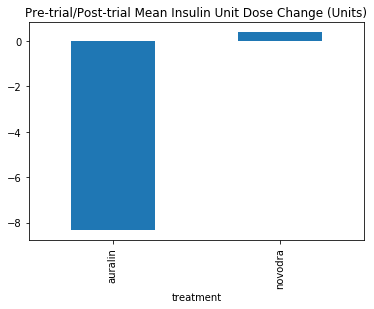

In [136]:
treatments_final.groupby('treatment').mean().dose_change.plot(kind='bar',
                                                              title='Pre-trial/Post-trial Mean Insulin Unit Dose Change (Units)');

In [140]:
treatments_before = treatments.copy()

In [147]:
treatments_auralin = treatments_before.query('auralin != "-"')

In [160]:
auralin_mean = treatments_auralin.hba1c_change.mean()

In [152]:
treatments_novodra = treatments_before.query('novodra != "-"')

In [161]:
novodra_mean = treatments_novodra.hba1c_change.mean()

In [164]:
before_describe = pd.Series({"auralin_mean": auralin_mean, "novodra_mean": novodra_mean})

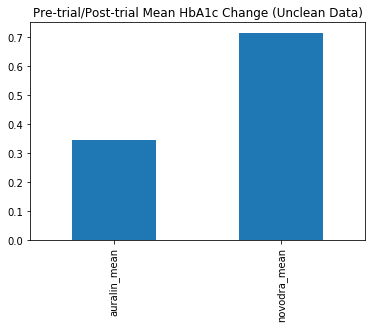

In [168]:
before_describe.plot(kind="bar",
                     title='Pre-trial/Post-trial Mean HbA1c Change (Unclean Data)');

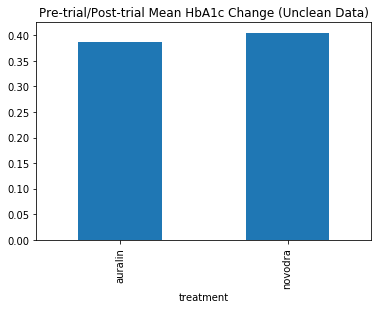

In [170]:
treatments_final.groupby('treatment').mean().hba1c_change.plot(kind="bar",
                                                               title='Pre-trial/Post-trial Mean HbA1c Change (Unclean Data)');

`Confidence Interval for the Difference in HbA1c change (Novodra - Auralin) Before and After Cleaning.`
* before_CI_upper_limit = 0.4289
* before_CI_lower_limit = 0.3108
* after_CI_upper_limit = 0.02965
* after_CI_lower_limit = 0.00486

#### 18. You Can Iterate 

As mentioned at the end of Lesson 3, the concept of iterating isn't that applicable for clinical trials given the rigor involved in their planning. But, theoretically, the following situations could arise that require iteration:

* Maybe you (as the data analyst or data scientist on the clinical trial research team) realized your statistical power calculations were wrong, and you needed to recruit more patients to make your study statistically significant. You'd also have to revisit gathering in this scenario.
* Maybe you realized you were missing a key piece of patient information, like patient blood type (again, unlikely given the rigor of clinical trials, but mistakes happen) because you discovered new research that related insulin resistance to blood type. You'd also have to revisit gathering in this scenario.
* Maybe you finished assessing, started cleaning, and spotted another data quality issue. Revisiting assessing to add these assessments to your notes is fine.

#### 19. Cleaning Summary

Cleaning is the third step in the data wrangling process:

* Gather
* Assess
* **Clean**

There are two types of cleaning:

* Manual (not recommended unless the issues are one-off occurrences)
* Programmatic

The programmatic data cleaning process:

1. Define: convert our assessments into defined cleaning tasks. These definitions also serve as an instruction list so others (or yourself in the future) can look at your work and reproduce it.
2. Code: convert those definitions to code and run that code.
3. Test: test your dataset, visually or with code, to make sure your cleaning operations worked.

Always make copies of the original pieces of data before cleaning!

#### 20. Conclusion

**Conclusion**:

* Convert your assessments from the previous lesson and defined, coded, and tested cleaning operations for them.
* Clean to improve quality and you did it efficiently using things like loops, functions, and regular expressions.
* Clean to tidy the data set using pandas's tidying functions, like melt.

**INSTRUCTOR NOTE**:

* Twitter: [David Venturi](https://twitter.com/venturidb)
* Twitter: [Mat Leonard](https://twitter.com/MCLeopard/)